# Global Power Plant Database

<b>Description</b>

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(('ignore'))
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE

In [190]:
data=pd.read_csv('global power.csv')
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [193]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [194]:
data.drop(['other_fuel1',
'other_fuel2',     
'other_fuel3',
'commissioning_year',
'owner',
'wepp_id',
'year_of_capacity_data',
'generation_gwh_2013',
'generation_gwh_2014',
'generation_gwh_2015',
'generation_gwh_2016',
'generation_gwh_2017',
'generation_data_source',
'estimated_generation_gwh','url'],axis=1,inplace=True)

Dropped all the columns that was having more that 30% missing values

In [195]:
data.isna().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

In [196]:
data['latitude']=data['latitude'].fillna("-1")

I am filling missing values by latitude as -1 because there is no point to fill them by mean and mode bcoz it represent address or location and i am also not dropping it because dataset is very small so i dont want to loose data

In [197]:
data['longitude']=data['longitude'].fillna("-1")

Same doing with longitude

In [198]:
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

In [199]:
data.isna().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

Now there is no missing values

In [200]:
data['gppd_idnr']=data['gppd_idnr'].str[:3]
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.609,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI
904,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About
905,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI
906,IND,India,ZAWAR MINES,WRI,80.0,24.35,73.7477,Coal,Hindustan Zinc ltd,WRI


In [201]:
import pingouin as pg

In [202]:
data.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.609,Coal,Ultratech Cement ltd,WRI


In [203]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [204]:
mod = ols('capacity_mw ~ source', data=data).fit()

In [205]:
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
source,5.812254e+07,190.0,0.88719,0.841865
Residual,2.472256e+08,717.0,NaN,NaN


In [206]:
expected, observed, stats=pg.chi2_independence(data, y='source',x='primary_fuel')

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,3368.508632,1330.0,5.388434e-177,0.727992,1.000000
1,cressie-read,0.666667,2480.794627,1330.0,2.513939e-72,0.624746,0.999995
2,log-likelihood,0.000000,1981.906519,1330.0,1.362704e-28,0.558405,0.999560
3,freeman-tukey,-0.500000,NaN,1330.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,1330.0,0.000000e+00,inf,1.000000
5,neyman,-2.000000,NaN,1330.0,NaN,NaN,NaN


# EDA

# Univariate Analysis

In [207]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.609,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [208]:
cols=['country','country_long','gppd_idnr','primary_fuel','geolocation_source']

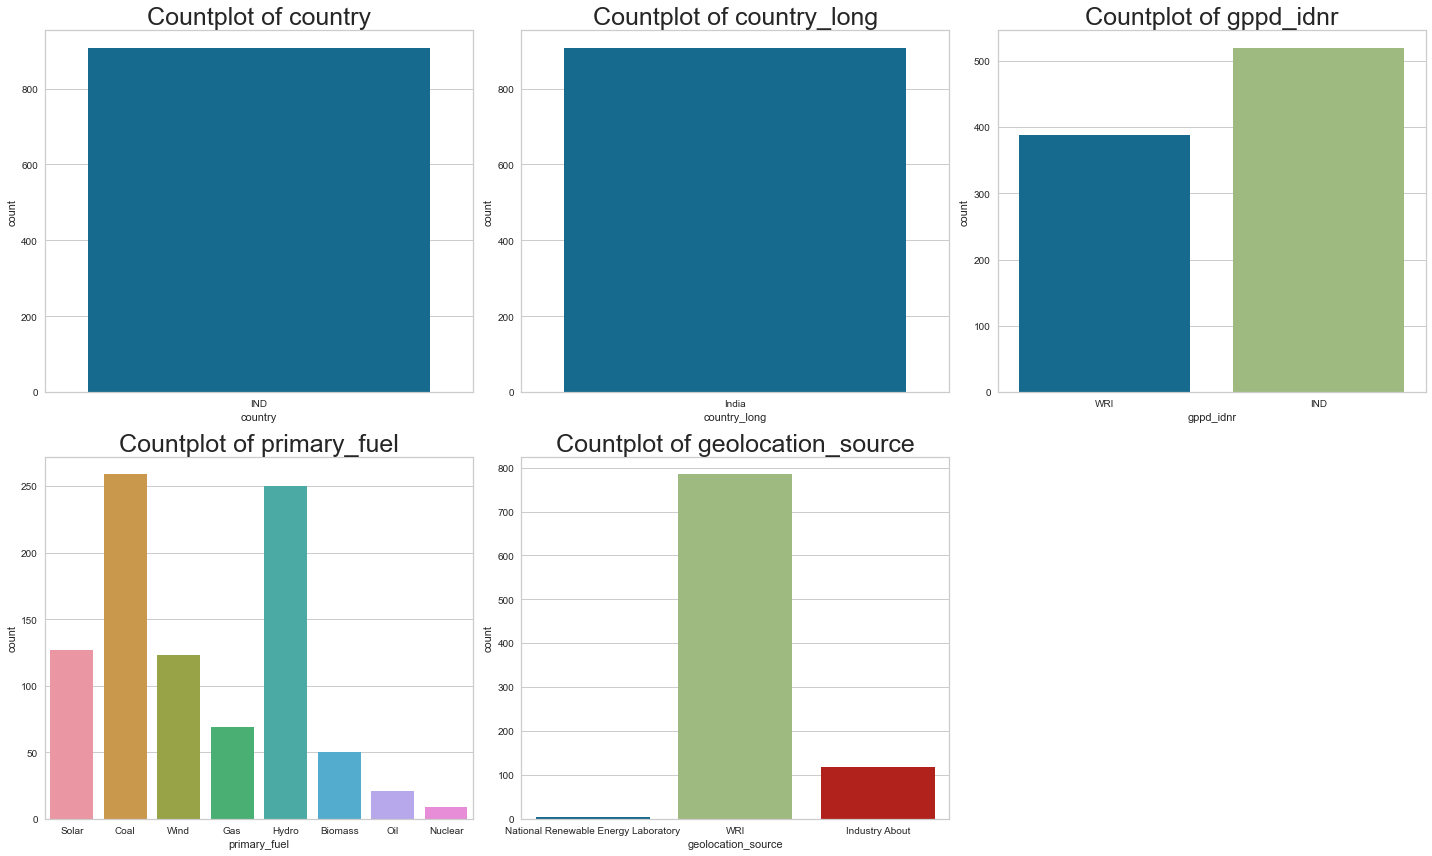

In [209]:
plt.figure(figsize=(20,12))
for i in range(0,len(cols)):
    plt.subplot(2,3,i+1)
    sns.countplot(data[cols[i]])
    plt.title(f"Countplot of {cols[i]}",fontsize=25)
    plt.tight_layout()

# Observation

1-From country and country_long i can say there is only value so i will drop these column because it contains only one value

2-from gppd_idnr i can say WRI has Count of 400 and IND has count of 500 means count of IND is greater

3-from primary_fuel i can say coal and hydro has the high count as compare to other and nuclear and oil has less count as compare to other means people use coal and hydro more as compare to other

4-from geolocation_source i can say WRI has 800 Count that is highest and National Renewable energy laboratory is very less and industry has about 100 count

# Distribution of continuous values

Text(0.5, 1.0, 'Distribution of longitude')

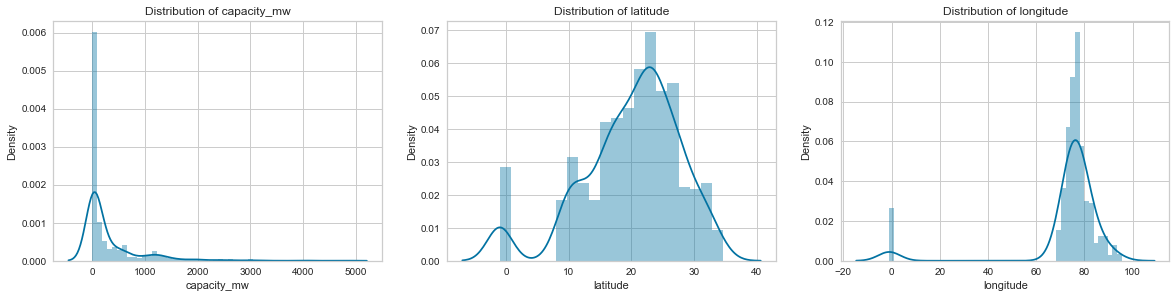

In [210]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(data['capacity_mw'])
plt.title("Distribution of capacity_mw")
plt.subplot(3,3,2)
sns.distplot(data['latitude'])
plt.title("Distribution of latitude")
plt.subplot(3,3,3)
sns.distplot(data['longitude'])
plt.title("Distribution of longitude")

# Observation

1-From distribution of capacity_mw i can say it has high left peak

2-from latitude i can say it is has only some data point only in middle that is can say middle peak only

3-from distribution of longitude i can say has right peak only

# Bivariate Analysis

In [211]:
from scipy.stats import norm

In [212]:
data['longitude']=data['longitude'].astype(float)

In [213]:
data['latitude']=data['latitude'].astype(float)

In [214]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [215]:
col1=['country', 'country_long', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel',
       'geolocation_source']

# Effect of all features on capacity mw

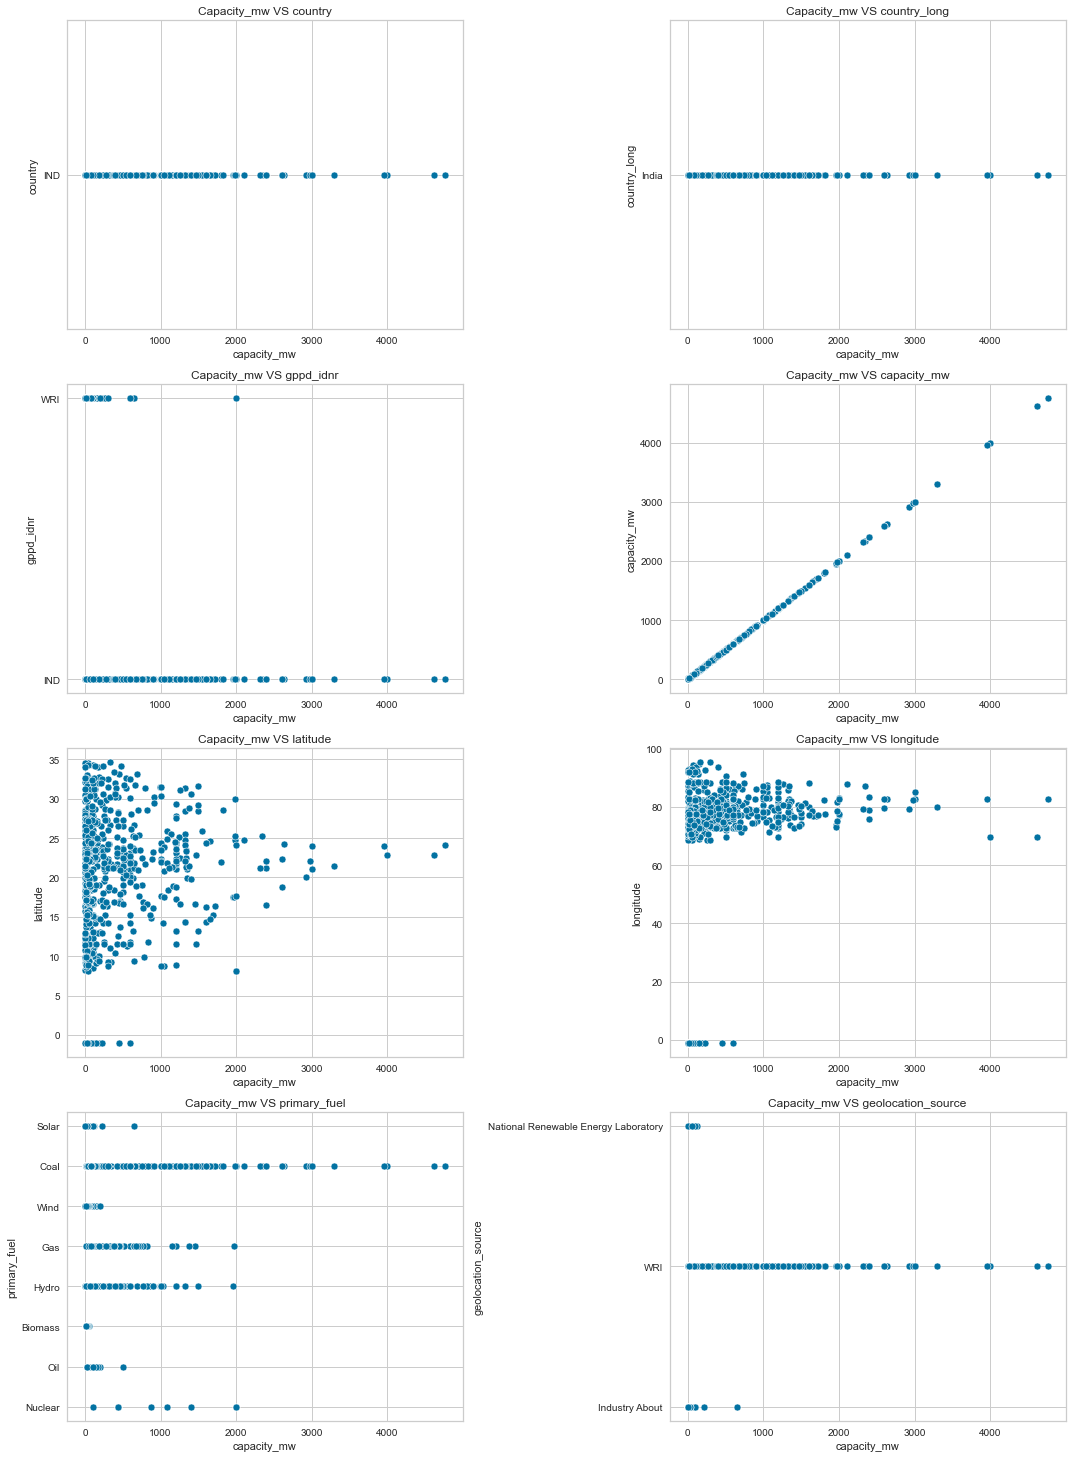

In [216]:
plt.figure(figsize=(15,25))
for i in range(0,len(col1)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=data['capacity_mw'],y=data[col1[i]])
    plt.title(f"Capacity_mw VS {col1[i]}")
    plt.tight_layout()

# Observation

1-from gppd_idnr i can say as the capacity is increasing the gppd_idnr is also iscreasing mostly for IND

2-And from capacity_mw i can say as the capacity is increasing more the value of primary_fuel is increasing means consumption of fuel is increasing

3-from geolocation_source i can say as the capacity_mw is increasing the value of WRI(Word Resource institute) is only increasing

4-and from other graph i can say there is no value means only one value is there so can not predict anything

# Effect of all features on primary_fuel

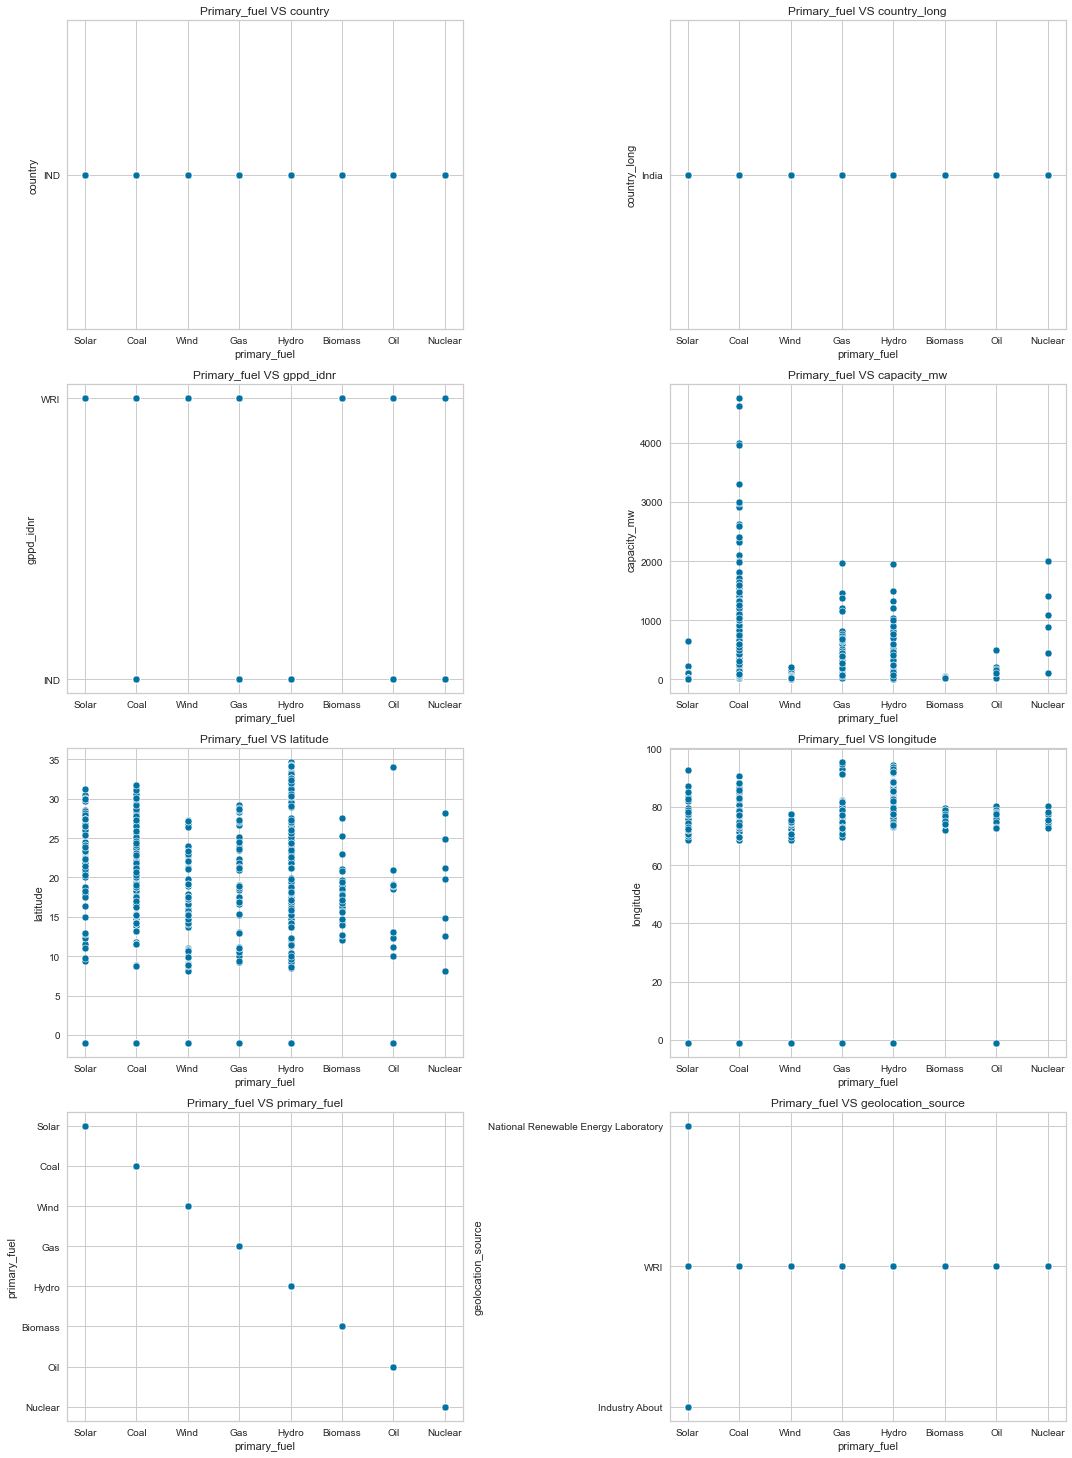

In [217]:
plt.figure(figsize=(15,25))
for i in range(0,len(col1)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=data['primary_fuel'],y=data[col1[i]])
    plt.title(f"Primary_fuel VS {col1[i]}")
    plt.tight_layout()

# Observation

1-there is only one observation that as the capacity increase consumption of coal also increase as compare to other

2-for rest of the columns i can say they contain only oen value and latitude and londitude just shows the location it mo observation from that also

In [218]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [219]:
data1=data.groupby('name')['capacity_mw'].sum()
data1=data1.reset_index()
data1=data1.sort_values(by=('capacity_mw'),ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'VINDH_CHAL STPS'),
  Text(1, 0, 'MUNDRA TPP'),
  Text(2, 0, 'MUNDRA UMPP'),
  Text(3, 0, 'SASAN UMPP'),
  Text(4, 0, 'TIRORA TPP'),
  Text(5, 0, 'TALCHER STPS'),
  Text(6, 0, 'RIHAND'),
  Text(7, 0, 'SIPAT STPS'),
  Text(8, 0, 'CHANDRAPUR_Coal'),
  Text(9, 0, 'ANPARA')])

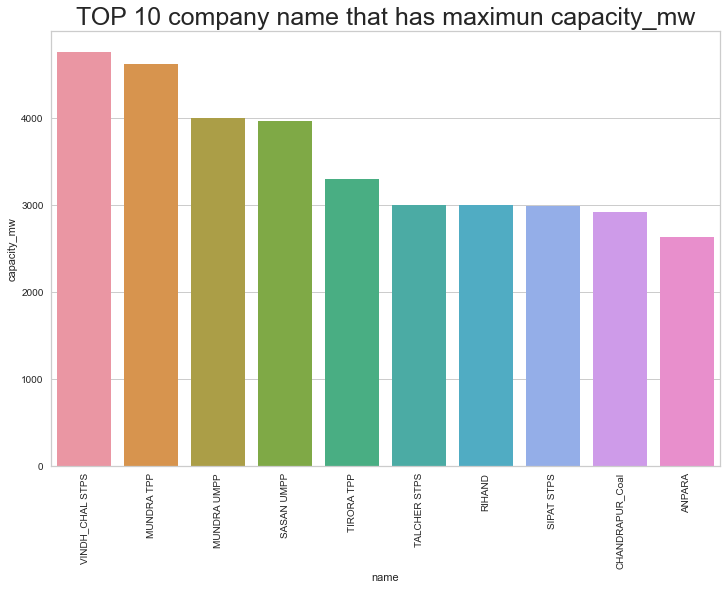

In [220]:
plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=data1.head(10))
plt.title("TOP 10 company name that has maximun capacity_mw",fontsize=25)
plt.xticks(rotation=90)

# Observation

I can say vindh_chal_stps is the top most compant that has maximun no. of capacity_mw as top 10 and from upper figure i can see all the 10 company name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Sai Sulphonates Wind Mill'),
  Text(1, 0, 'Phagi Solar Power Plant'),
  Text(2, 0, 'Bonada Solar Power Plant'),
  Text(3, 0, 'Bamanwali Solar Power Plant'),
  Text(4, 0, 'Khirwa Solar Power Plant'),
  Text(5, 0, 'Komal West Solar Power Plant'),
  Text(6, 0, 'Amarsar Solar Power Plant'),
  Text(7, 0, 'Rasulpur Solar Power Plant'),
  Text(8, 0, 'Bamani Solar Power Plant'),
  Text(9, 0, 'Mirpur Kalan - Nexgen Solux Solar Power Plant'),
  Text(10, 0, 'Sadeipali - REHPL Solar Power Plant'),
  Text(11, 0, 'Patodi Solar Power Plant'),
  Text(12, 0, 'Isanpur Solar Power Plant'),
  Text(13, 0, 'Dugar Solar Power Plant'),
  Text(14, 0, 'Godelai Solar Power Plant'),
  Text(15, 0, 'Lallian Kalan Solar Power Plant'),
  Text(16, 0, 'Gandhinagar Solar Power Plant'),
  Text(17, 0, 'Lathi Solar Power Plant'),
  Text(18, 0, 'Belagau Wind Farm'),
  Text(19, 0, 'Tata BP - Electronics City Solar 

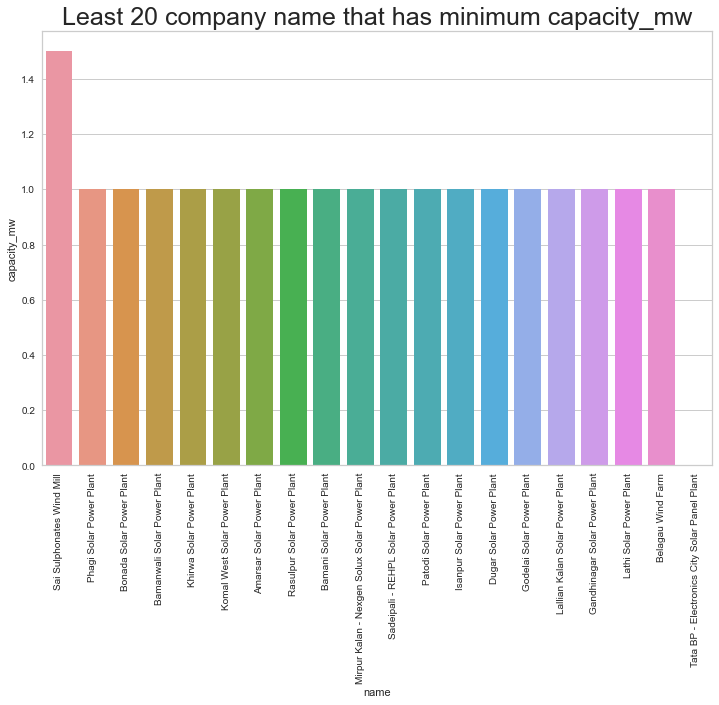

In [221]:
plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=data1.tail(20))
plt.title("Least 20 company name that has minimum capacity_mw",fontsize=25)
plt.xticks(rotation=90)

From upper graph, it can be seen that companies produce 1mw power except Sai sulphonates and Tata bp.

In [222]:
data2=data.groupby('source')['capacity_mw'].max()
data2=data2.reset_index()
data2=data2.sort_values(by=('capacity_mw'),ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Central Electricity Authority'),
  Text(1, 0, 'IAEA'),
  Text(2, 0, 'Adani Power Limite r Er'),
  Text(3, 0, 'Dhariwal Pvt ltd'),
  Text(4, 0, 'Hindustan Pvt lt'),
  Text(5, 0, 'Shree Cement ltd'),
  Text(6, 0, 'Rattanindia Power ltd'),
  Text(7, 0, 'Ideal Projects ltd'),
  Text(8, 0, 'Hindustan Zinc ltd'),
  Text(9, 0, 'Solar for India'),
  Text(10, 0, 'CDM'),
  Text(11, 0, 'Mangalore & petrochem'),
  Text(12, 0, 'Jaypee Ltd jccl)'),
  Text(13, 0, 'National Renewable Energy Laboratory'),
  Text(14, 0, 'Dcm & chem'),
  Text(15, 0, 'Gupta Ltd gepl)'),
  Text(16, 0, 'Reliance Power Ltd'),
  Text(17, 0, 'Maharashtra State Power Generation Co Ltd (MAHAGENCO)'),
  Text(18, 0, 'Bharat Refinery ltd'),
  Text(19, 0, 'Ultratech Cement ltd')])

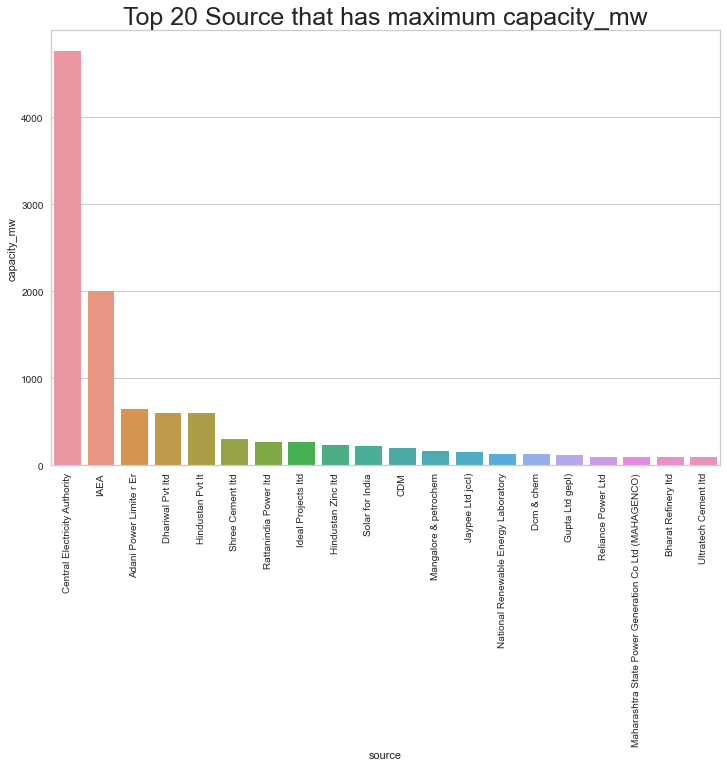

In [223]:
plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=data2.head(20))
plt.title("Top 20 Source that has maximum capacity_mw",fontsize=25)
plt.xticks(rotation=90)

# Observation

1. It can be seen that central electricity authority has the higher capacity_mw value with the value of more then 4000.

2. And ultratech cement has the least value of capacity_mw as compare to the top 20 source.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CleanEnerg teLeanenergy'),
  Text(1, 0, 'Powers Private'),
  Text(2, 0, 'PEDA'),
  Text(3, 0, 'Real Estate e'),
  Text(4, 0, 'West Bengal Energy Development Corporation Limited (WBEDCL)'),
  Text(5, 0, 'Clover Solar Private Limited (CSPL)'),
  Text(6, 0, 'Sepset Constructio te'),
  Text(7, 0, 'Astonfield Management Limited'),
  Text(8, 0, 'Solaer'),
  Text(9, 0, 'S Limited Rsolar'),
  Text(10, 0, 'AES Winfra'),
  Text(11, 0, 'Ambed K Sugar'),
  Text(12, 0, 'Power Private edM/Pdf'),
  Text(13, 0, 'Raajratna Energy Holdings Private Limited (REHPL)'),
  Text(14, 0, 'Sovox Renewables Private Limited'),
  Text(15, 0, 'Infratech e M/Pdf'),
  Text(16, 0, 'Navbharat'),
  Text(17, 0, 'Harsha Engineers Limited'),
  Text(18, 0, 'Pandit Deendayal Petrolium University (PDPU)'),
  Text(19, 0, 'Tata BP Solar India Limited')])

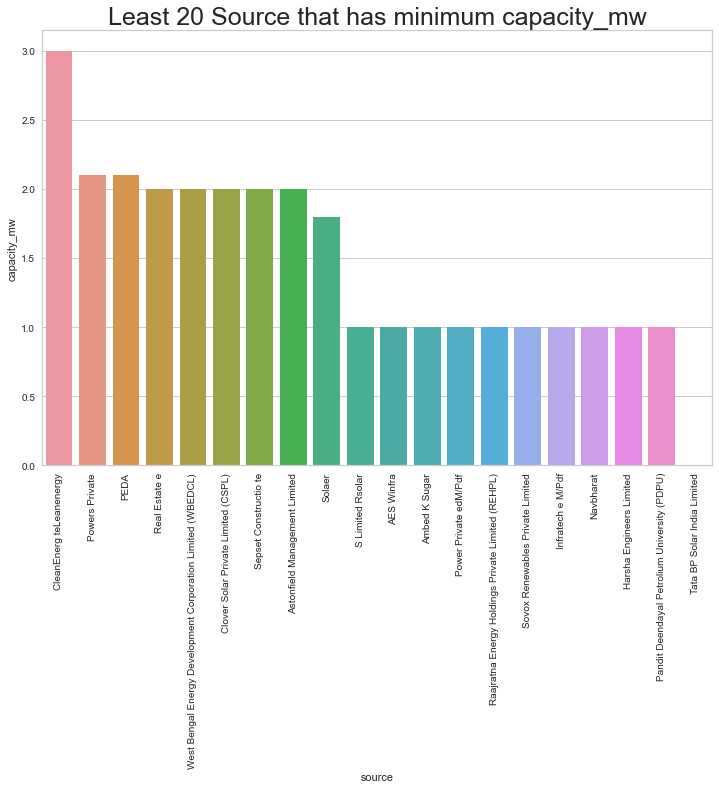

In [224]:
plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=data2.tail(20))
plt.title("Least 20 Source that has minimum capacity_mw",fontsize=25)
plt.xticks(rotation=90)

From upper above graph it can be seen that the least 20 source has the least value of capacity.

In [225]:
data0=data[data['primary_fuel']=='Coal']

In [226]:
data4=data0.groupby('source')['primary_fuel'].count()
data4=data4.reset_index()
data4=data4.sort_values(by=('primary_fuel'),ascending=False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'India Ltd icl)'),
  Text(1, 0, 'Jai Industries ltd'),
  Text(2, 0, 'Janki Corp ltd'),
  Text(3, 0, 'Kesoram Industries ltd'),
  Text(4, 0, 'Vikram Vikram cement')])

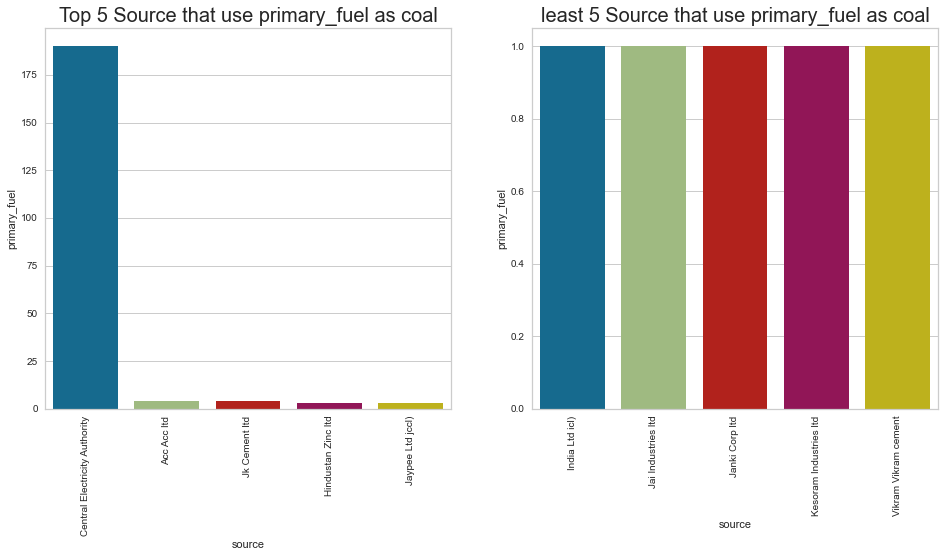

In [227]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(x='source',y='primary_fuel',data=data4.head(5))
plt.title("Top 5 Source that use primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='source',y='primary_fuel',data=data4.tail(5))
plt.title("least 5 Source that use primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90)

# Observation

1. From top source, it is clear that central electricity authority uses the coal at very high level as compare to others.

2. From least scource, it is clear that all are same - all have only 1 count means they use very less coal

In [228]:
vc=data['primary_fuel'].value_counts()
vc

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

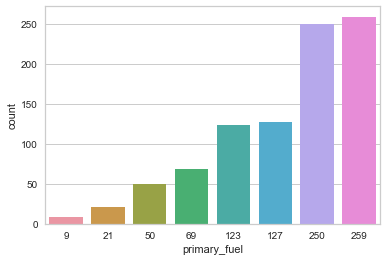

In [229]:
sns.countplot(x=data['primary_fuel'], data=vc)

As we have longitude and latitude, we can find the city, state and many more thing as per requirement

In [230]:
!pip install reverse_geocoder

You should consider upgrading via the 'c:\users\dks_m\anaconda3\python.exe -m pip install --upgrade pip' command.


In [231]:
import reverse_geocoder as rg
import pprint
data00=[]
def reverseGeocode(coordinates):
    result=rg.search(coordinates)
    return (result)
if __name__=="__main__":
    coordinates=list(zip(data['latitude'],data['longitude']))
    data12=reverseGeocode(coordinates)
    data00.append(data12)

new_data=pd.DataFrame(data00).transpose()

In [232]:
data.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI


# Feature Engineering

In [233]:
data['state']=new_data[0].apply(lambda x:x.get('admin1'))

data['Country']=new_data[0].apply(lambda x:x.get('cc'))

In [234]:
data_Coal=data[data['primary_fuel']=='Coal']
data_Hydro=data[data['primary_fuel']=='Hydro']
data_Solar=data[data['primary_fuel']=='Solar']
data_Wind=data[data['primary_fuel']=='Wind']
data_Gas=data[data['primary_fuel']=='Gas']
data_Biomass=data[data['primary_fuel']=='Biomass']
data_Oil=data[data['primary_fuel']=='Oil']

In [235]:
data5=data_Coal.groupby('source')['primary_fuel'].count()
data5=data5.reset_index()
data5=data5.sort_values(by=('primary_fuel'),ascending=False)

In [236]:
data6=data_Hydro.groupby('source')['primary_fuel'].count()
data6=data6.reset_index()
data6=data6.sort_values(by=('primary_fuel'),ascending=False)

In [237]:
data7=data_Solar.groupby('source')['primary_fuel'].count()
data7=data7.reset_index()
data7=data7.sort_values(by=('primary_fuel'),ascending=False)

In [238]:
data8=data_Wind.groupby('source')['primary_fuel'].count()
data8=data8.reset_index()
data8=data8.sort_values(by=('primary_fuel'),ascending=False)

In [239]:
data9=data_Gas.groupby('source')['primary_fuel'].count()
data9=data9.reset_index()
data9=data9.sort_values(by=('primary_fuel'),ascending=False)

In [240]:
data10=data_Biomass.groupby('source')['primary_fuel'].count()
data10=data10.reset_index()
data10=data10.sort_values(by=('primary_fuel'),ascending=False)

In [241]:
data11=data_Oil.groupby('source')['primary_fuel'].count()
data11=data11.reset_index()
data11=data11.sort_values(by=('primary_fuel'),ascending=False)

# Top 5 source that use different type of fuels

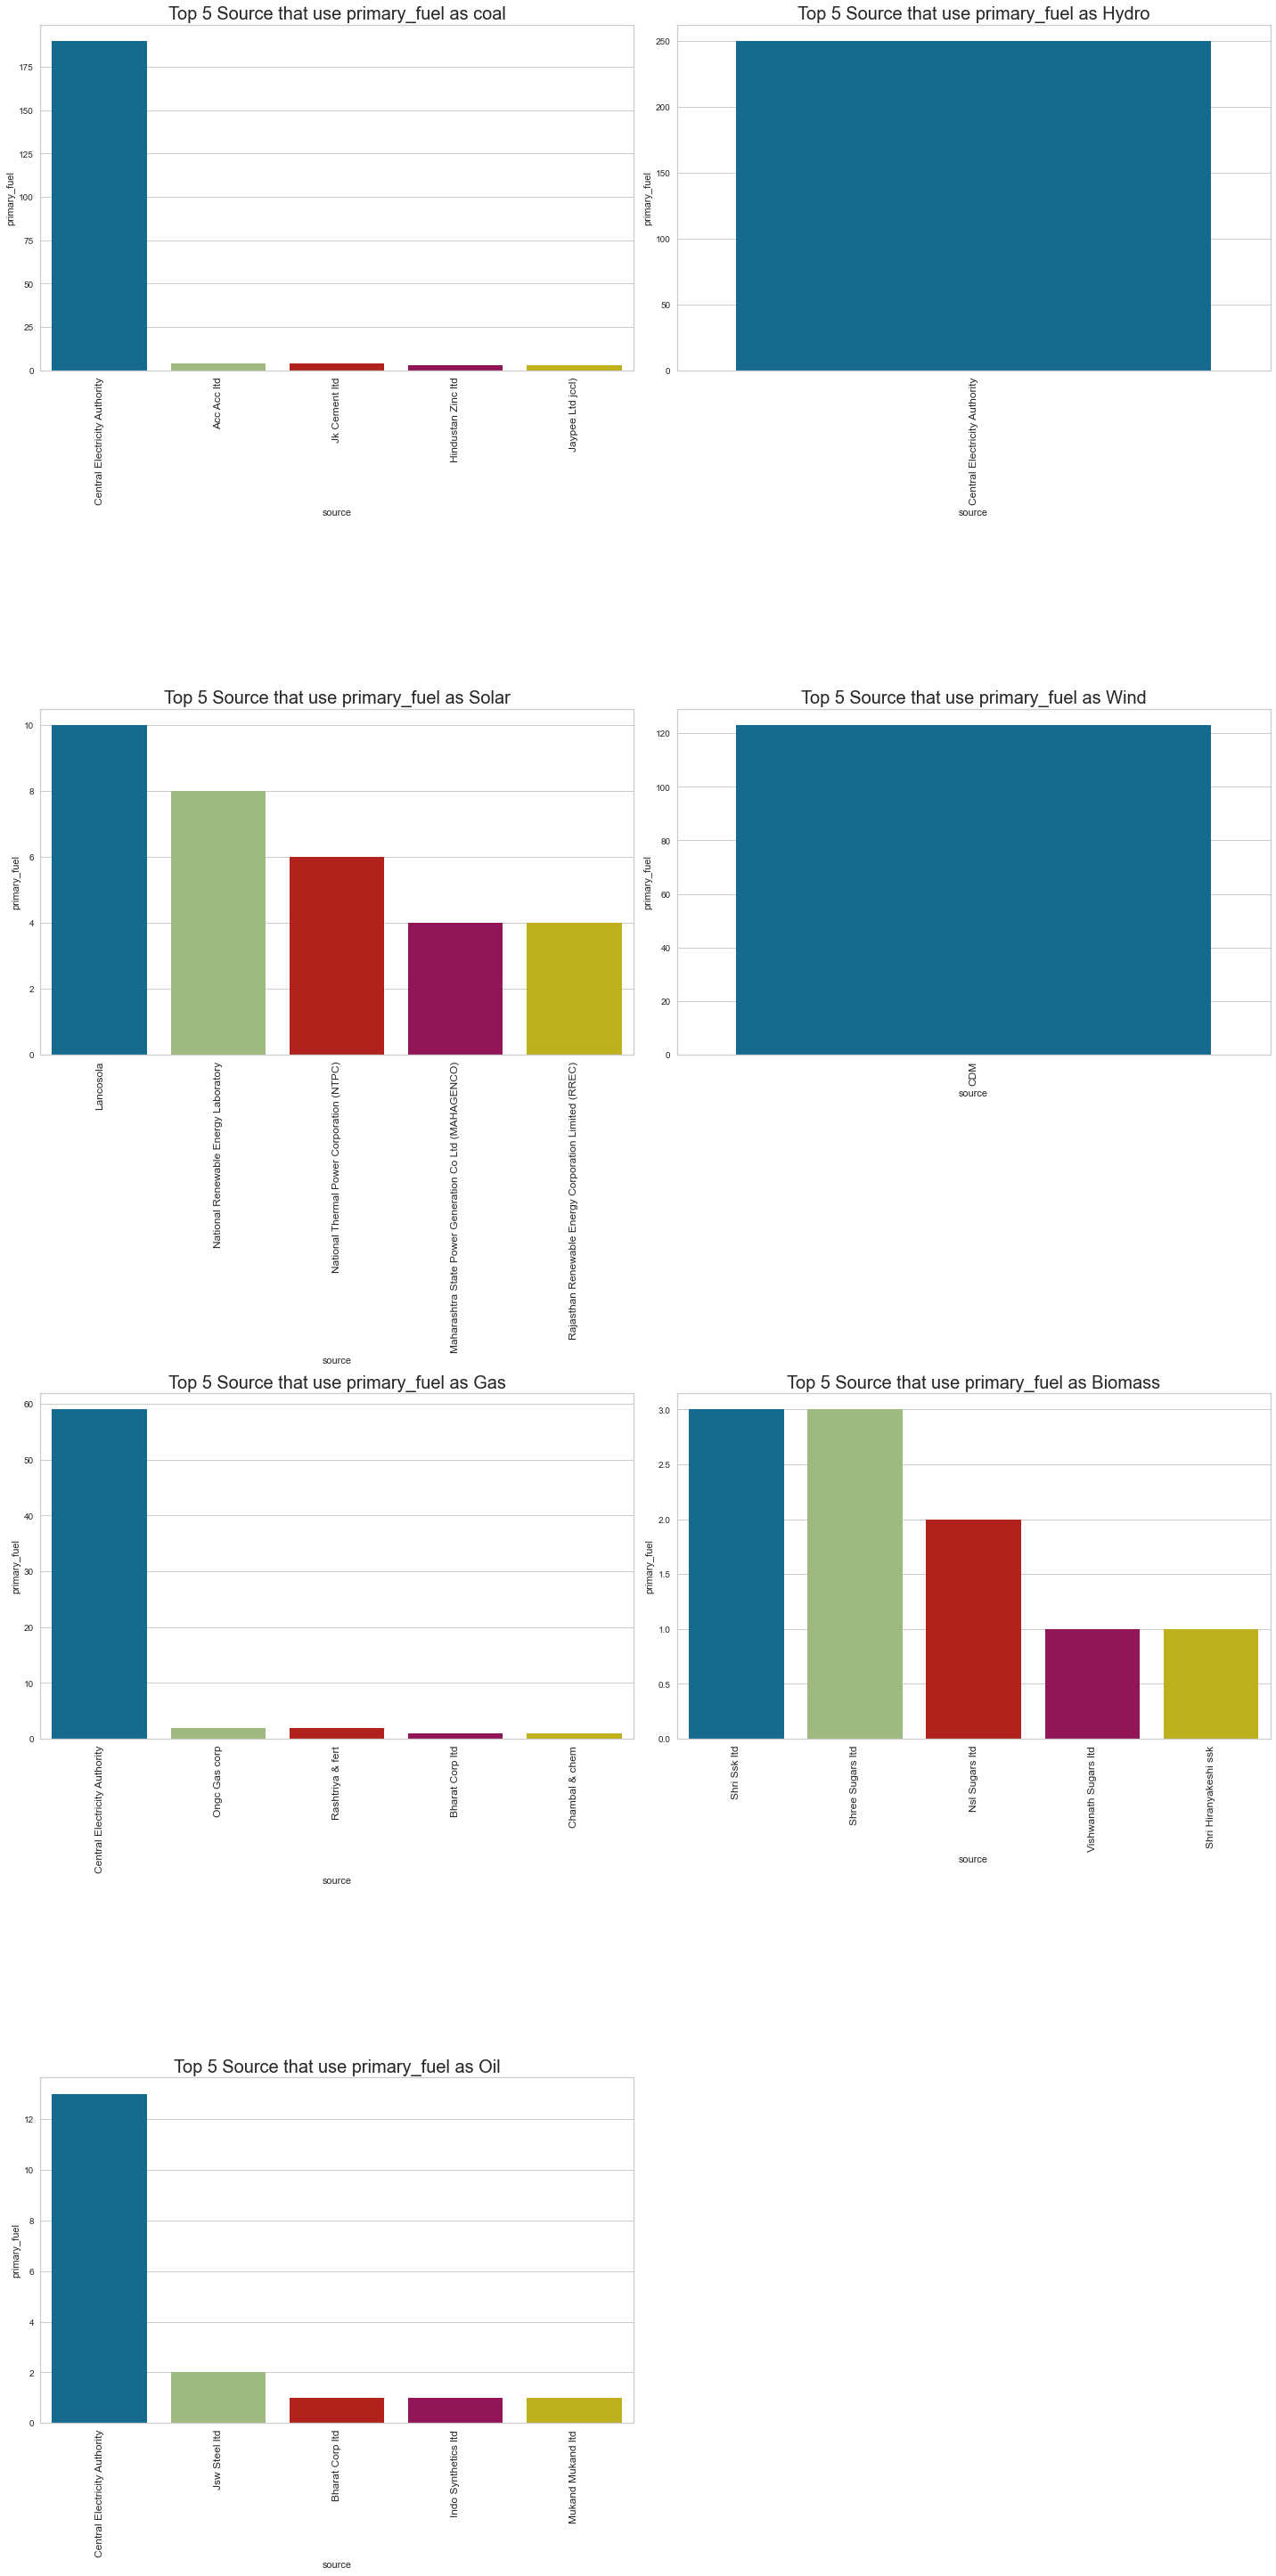

In [242]:
plt.figure(figsize=(20,70))
plt.subplot(7,2,1)
sns.barplot(x='source',y='primary_fuel',data=data5.head(5))
plt.title("Top 5 Source that use primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,2)
sns.barplot(x='source',y='primary_fuel',data=data6.head(5))
plt.title("Top 5 Source that use primary_fuel as Hydro",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,3)
sns.barplot(x='source',y='primary_fuel',data=data7.head(5))
plt.title("Top 5 Source that use primary_fuel as Solar",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,4)
sns.barplot(x='source',y='primary_fuel',data=data8.head(5))
plt.title("Top 5 Source that use primary_fuel as Wind",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,5)
sns.barplot(x='source',y='primary_fuel',data=data9.head(5))
plt.title("Top 5 Source that use primary_fuel as Gas",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,6)
sns.barplot(x='source',y='primary_fuel',data=data10.head(5))
plt.title("Top 5 Source that use primary_fuel as Biomass",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,7)
sns.barplot(x='source',y='primary_fuel',data=data11.head(5))
plt.title("Top 5 Source that use primary_fuel as Oil",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.tight_layout()

# Observation

<b>1. from coal i can say top 5 source are</b> 

*Central Electricity Authority

*Acc Acc ltd

*Jk Cement ltd

*Hindustan Zinc ltd

*Jaypee Ltd jccl

<b>2. from solar i can say top 5 source are</b>

*Lancosola

*National Renewable Energy Laboratory

*National Thermal Power Corporation (NTPC)

*Maharashtra State Power Generation Co Ltd

*Rajasthan Renewable Energy Corporation Limited

<b>3. From gas i can say top 5 source are</b>

*Central Electricity Authority

*Ongc Gas corp

*Rashtriya & fert

*Bharat Corp ltd

*Chambal & chem

<b>4. From biomass i can say top 5 source are</b>

*Shri Ssk ltd

*Shree Sugars ltd

*Nsl Sugars ltd

*Vishwanath Sugars ltd

*Shri Hiranyakeshi ssk

<b>5. From oil i can say top 5 sources are</b>

*Central Electricity Authority

*Jsw Steel ltd

*Bharat Corp ltd

*Indo Synthetics ltd

*Mukand Mukand ltd**

<AxesSubplot:ylabel='capacity_mw'>

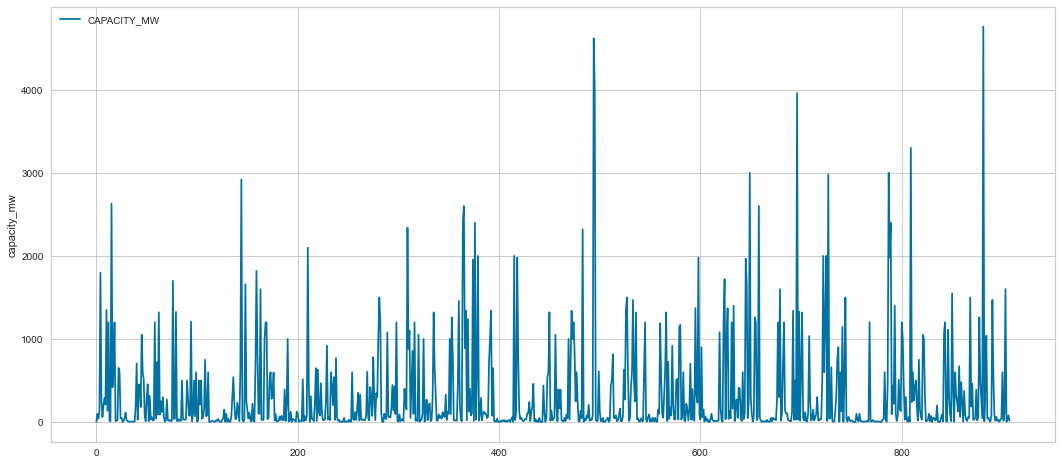

In [243]:
plt.figure(figsize=(18,8))
sns.lineplot(data=data['capacity_mw'],label='CAPACITY_MW')

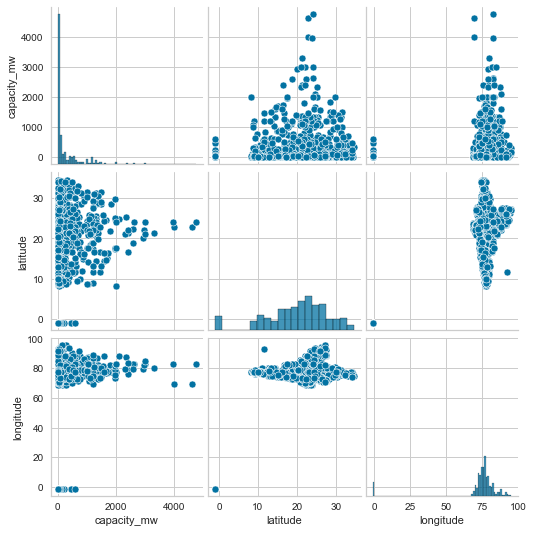

In [244]:
sns.pairplot(data)

In [245]:
#data["ZipCode"] = data.apply(lambda x:geolocator.reverse(str(x["latitude"])+", "+str(x["longitude"])).address, axis=1)

In [246]:
!pip install reverse_geocoder

You should consider upgrading via the 'c:\users\dks_m\anaconda3\python.exe -m pip install --upgrade pip' command.


In [247]:
data_state=data.groupby('state')['capacity_mw'].sum()
data_state=data_state.reset_index()
data_state=data_state.sort_values(by=('capacity_mw'),ascending=False)

# Top 10 state that has high capacity_mw

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Arunachal Pradesh'),
  Text(1, 0, 'Western Region'),
  Text(2, 0, 'Meghalaya'),
  Text(3, 0, 'Goa'),
  Text(4, 0, 'Manipur'),
  Text(5, 0, 'Nagaland'),
  Text(6, 0, 'Mizoram'),
  Text(7, 0, 'Samchi'),
  Text(8, 0, 'Pondicherry'),
  Text(9, 0, 'Andaman and Nicobar Islands')])

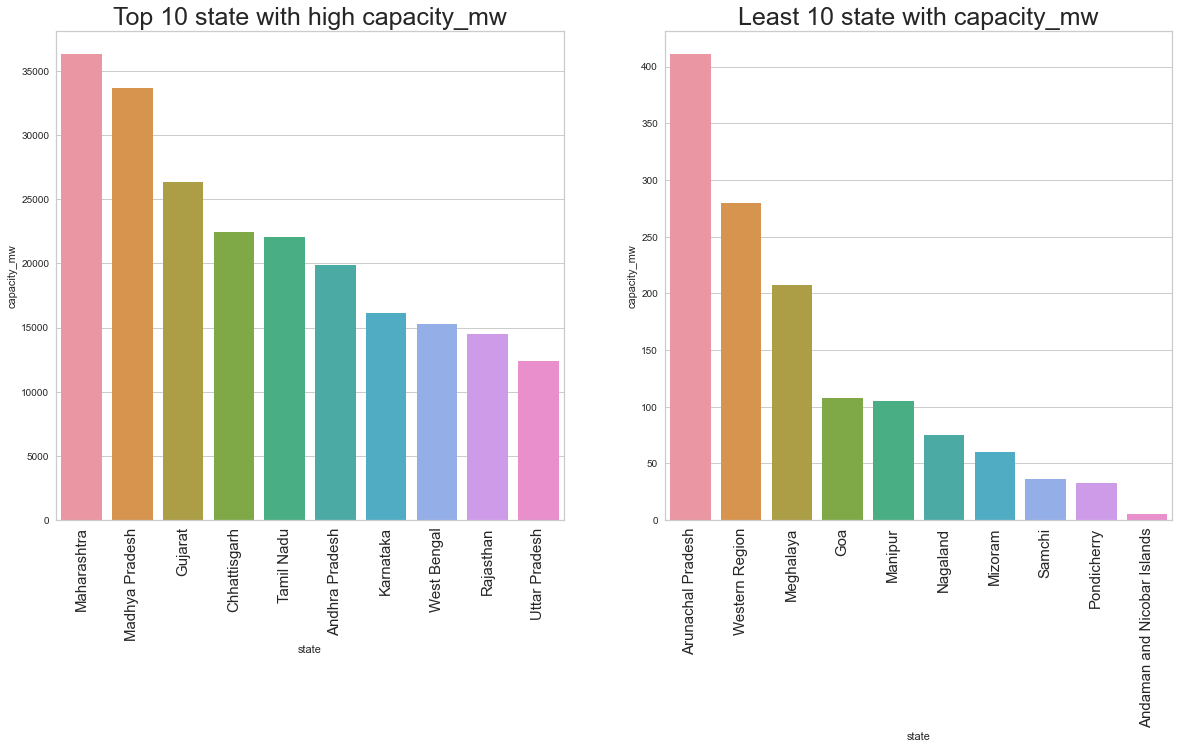

In [248]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
sns.barplot(x='state',y='capacity_mw',data=data_state.head(10))
plt.title("Top 10 state with high capacity_mw",fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(1,2,2)
sns.barplot(x='state',y='capacity_mw',data=data_state.tail(10))
plt.title("Least 10 state with capacity_mw",fontsize=25)
plt.xticks(rotation=90,fontsize=15)

# Observation

<b>For top 10 capacity we have below state with count</b>

Maharashtra 36300.390

Madhya Pradesh 33657.970

Gujarat 26307.511

Chhattisgarh 22445.800

Tamil Nadu 22061.180

Andhra Pradesh 19860.284

Karnataka 16169.100

West Bengal 15237.200

Rajasthan 14528.430

Uttar Pradesh 12354.800

For least 10 capacity we have below state we count

Arunachal Pradesh 411.0

Western Region 280.0

Meghalaya 207.2

Goa 108.0

Manipur 105.0

Nagaland 75.0

Mizoram 60.0

Samchi 36.0

Pondicherry 32.5

Andaman and Nicobar Islands 5.0

In [249]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,state,Country
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Rajasthan,IN
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,Rajasthan,IN
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI,Gujarat,IN
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,Tripura,IN
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,Chhattisgarh,IN


In [250]:
data51=data_Coal.groupby('state')['primary_fuel'].count()
data51=data51.reset_index()
data51=data51.sort_values(by=('primary_fuel'),ascending=False)

data61=data_Hydro.groupby('state')['primary_fuel'].count()
data61=data61.reset_index()
data61=data61.sort_values(by=('primary_fuel'),ascending=False)

data71=data_Solar.groupby('state')['primary_fuel'].count()
data71=data71.reset_index()
data71=data71.sort_values(by=('primary_fuel'),ascending=False)

data81=data_Wind.groupby('state')['primary_fuel'].count()
data81=data81.reset_index()
data81=data81.sort_values(by=('primary_fuel'),ascending=False)

data91=data_Gas.groupby('state')['primary_fuel'].count()
data91=data91.reset_index()
data91=data91.sort_values(by=('primary_fuel'),ascending=False)

data101=data_Biomass.groupby('state')['primary_fuel'].count()
data101=data101.reset_index()
data101=data101.sort_values(by=('primary_fuel'),ascending=False)

data111=data_Oil.groupby('state')['primary_fuel'].count()
data111=data111.reset_index()
data111=data111.sort_values(by=('primary_fuel'),ascending=False)

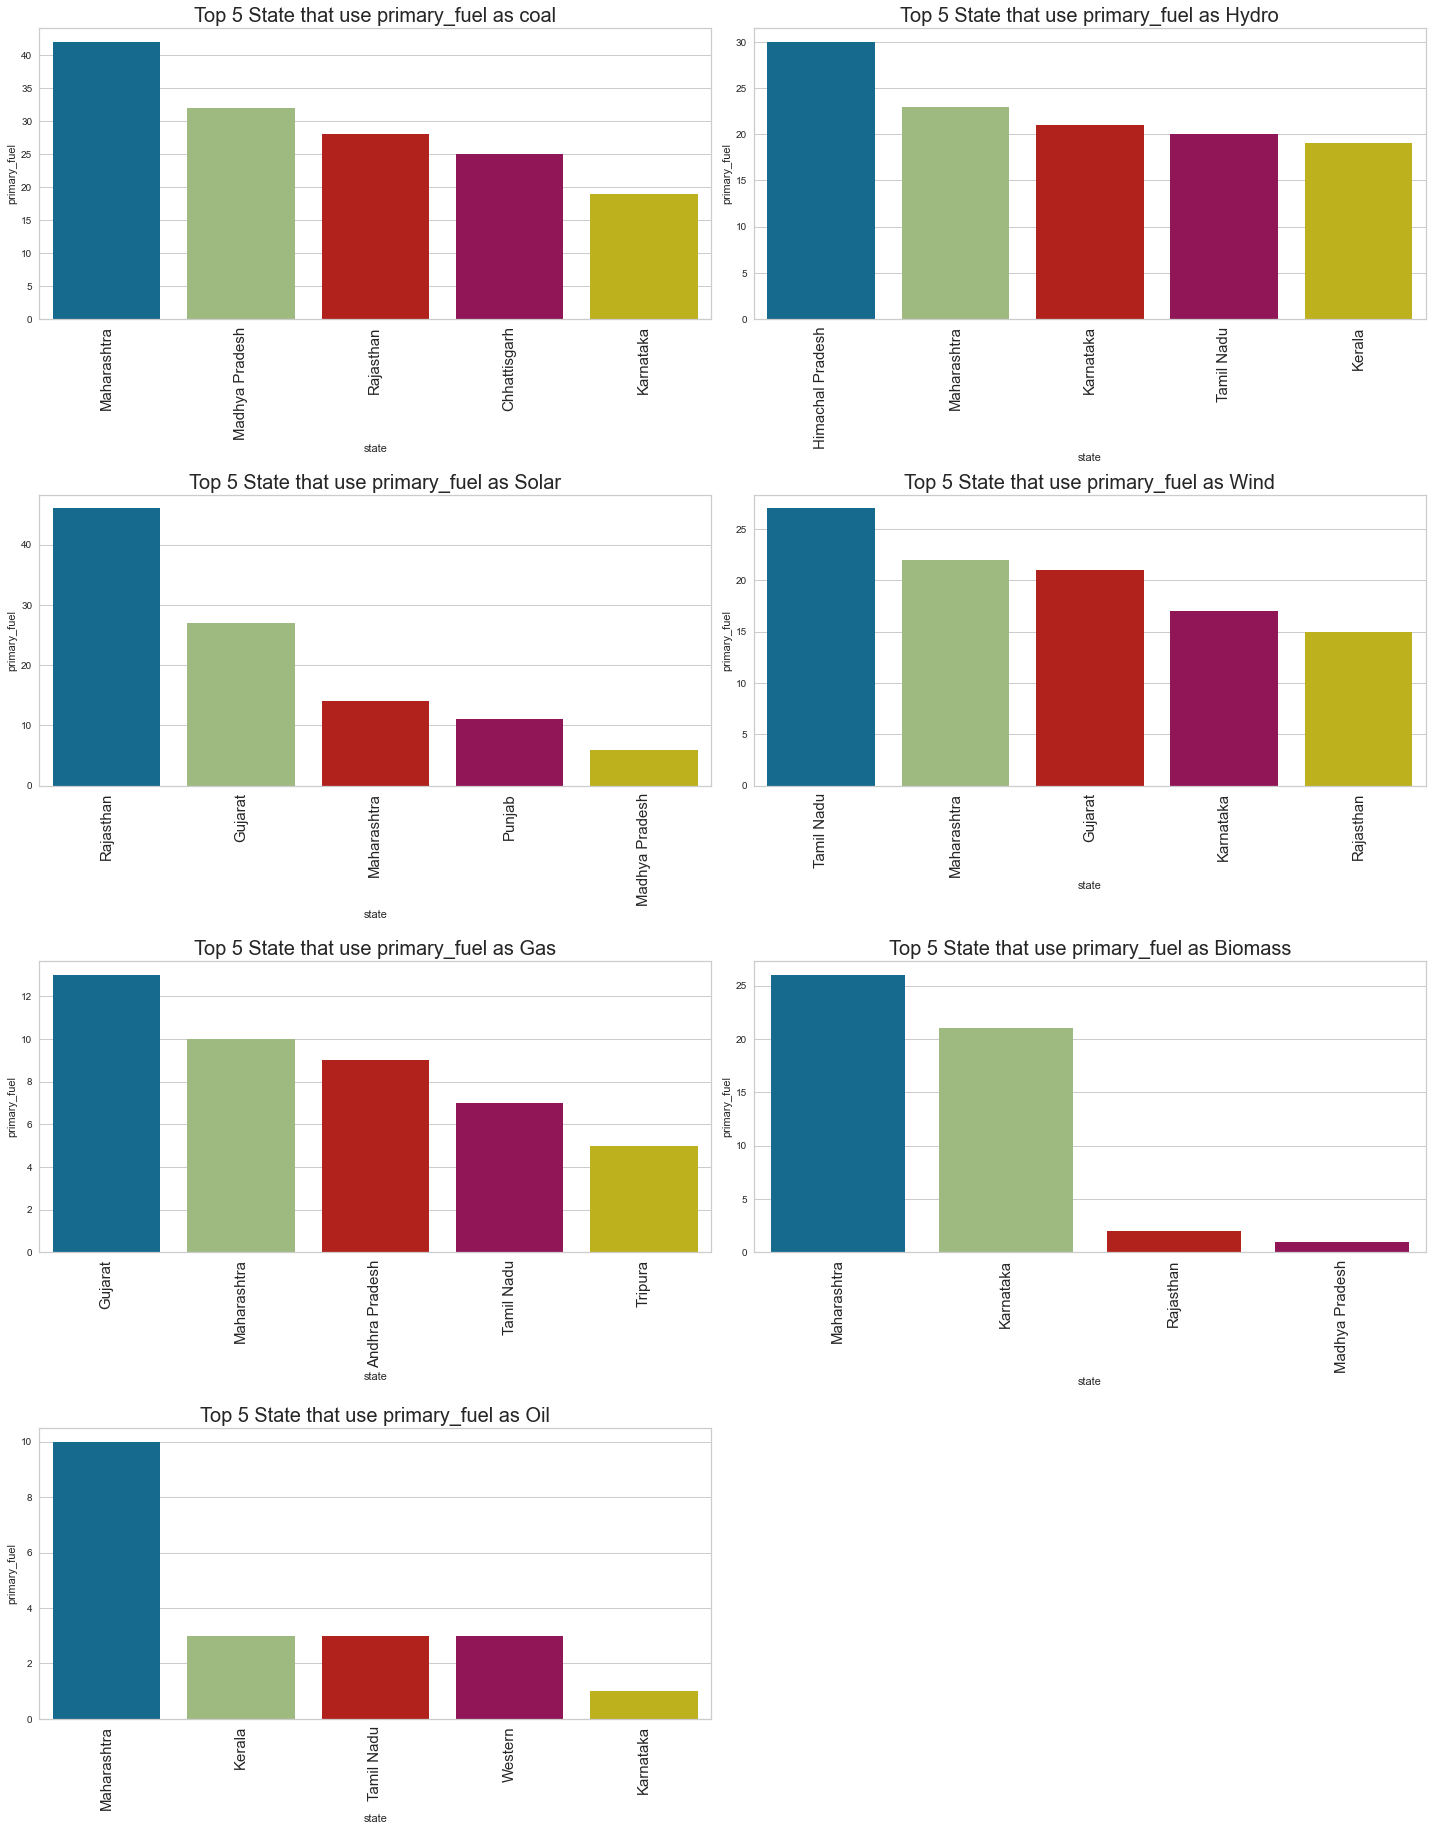

In [251]:
plt.figure(figsize=(20,50))
plt.subplot(8,2,1)
sns.barplot(x='state',y='primary_fuel',data=data51.head(5))
plt.title("Top 5 State that use primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,2)
sns.barplot(x='state',y='primary_fuel',data=data61.head(5))
plt.title("Top 5 State that use primary_fuel as Hydro",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,3)
sns.barplot(x='state',y='primary_fuel',data=data71.head(5))
plt.title("Top 5 State that use primary_fuel as Solar",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,4)
sns.barplot(x='state',y='primary_fuel',data=data81.head(5))
plt.title("Top 5 State that use primary_fuel as Wind",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,5)
sns.barplot(x='state',y='primary_fuel',data=data91.head(5))
plt.title("Top 5 State that use primary_fuel as Gas",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,6)
sns.barplot(x='state',y='primary_fuel',data=data101.head(5))
plt.title("Top 5 State that use primary_fuel as Biomass",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,7)
sns.barplot(x='state',y='primary_fuel',data=data111.head(5))
plt.title("Top 5 State that use primary_fuel as Oil",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.tight_layout()

# Observation

</b>1. From state wise coal fuel we can see the state and count</b>

Maharashtra 42

Madhya Pradesh 32

Rajasthan 28

Chhattisgarh 25

Karnataka 19

<b>2. From state wise hydro fuel the count is</b>

Himachal Pradesh 30

Maharashtra 23

Karnataka 21

Tamil Nadu 20

Kerala 19

<b>3. From state wise solar as a fuel has a count</b>

Rajasthan 46

Gujarat 27

Maharashtra 14

Punjab 11

Madhya Pradesh 6

<b>4. State wise Wind as a fuel has a count of</b>

Tamil Nadu 27

Maharashtra 22

Gujarat 21

Karnataka 17

Rajasthan 15

<b>5. State wise Gas as fuel has a count of</b>

Gujarat 13

Maharashtra 10

Andhra Pradesh 9

Tamil Nadu 7

Tripura 5

<b>6. State wise Biomass as a fuel has a count of</b>

Maharashtra 26

Karnataka 21

Rajasthan 2

Madhya Pradesh 1

<b>7. State wise Oil as a fuel has a count of</b>

state primary_fuel

Maharashtra 10

Kerala 3

Tamil Nadu 3

Western 3

Karnataka 1

In [252]:
data['Country'].value_counts()

IN    860
GH     46
NP      1
BT      1
Name: Country, dtype: int64

In [253]:
data['Country']=data['Country'].replace({'IN':'INDIA','GH':'GHANA','NP':'NEPAL','BT':'BHUTAN'})
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,state,Country
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Rajasthan,INDIA
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,Rajasthan,INDIA
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI,Gujarat,INDIA
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,Tripura,INDIA
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,Karnataka,INDIA
904,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,Karnataka,INDIA
905,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI,Karnataka,INDIA
906,IND,India,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,Rajasthan,INDIA


In [254]:
data['country_long'].unique()

array(['India'], dtype=object)

In [255]:
data['country'].unique()

array(['IND'], dtype=object)

name, source, country_long & country - dropping all, as these don't have any impact on our target.

In [256]:
data.drop(['country','country_long','name','source'],axis=1,inplace=True)

In [257]:
data

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,Rajasthan,INDIA
1,WRI,98.0,24.7663,74.6090,Coal,WRI,Rajasthan,INDIA
2,WRI,39.2,21.9038,69.3732,Wind,WRI,Gujarat,INDIA
3,IND,135.0,23.8712,91.3602,Gas,WRI,Tripura,INDIA
4,IND,1800.0,21.9603,82.4091,Coal,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...
903,IND,1600.0,16.2949,77.3568,Coal,WRI,Karnataka,INDIA
904,WRI,3.0,12.8932,78.1654,Solar,Industry About,Karnataka,INDIA
905,WRI,25.5,15.2758,75.5811,Wind,WRI,Karnataka,INDIA
906,WRI,80.0,24.3500,73.7477,Coal,WRI,Rajasthan,INDIA


In [258]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,power_transform
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

I am using ordinal encoder because most of the columns are having order

In [259]:
oe=OrdinalEncoder()
def ordinal_transform(df,column):
    df[column]=oe.fit_transform(df[column])
    return df

In [260]:
print(data['primary_fuel'].unique())
print("\n")
print(data['geolocation_source'].unique())
print("\n")
print(data['state'].unique())
print("\n")
print(data['Country'].unique())
print("\n")
print(data['gppd_idnr'].unique())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']


['National Renewable Energy Laboratory' 'WRI' 'Industry About']


['Rajasthan' 'Gujarat' 'Tripura' 'Chhattisgarh' 'Tamil Nadu'
 'Himachal Pradesh' 'Karnataka' 'Madhya Pradesh' 'Maharashtra' 'Punjab'
 'Western' 'Uttar Pradesh' 'Andhra Pradesh' 'Kashmir' 'West Bengal'
 'Odisha' 'Bihar' 'Jharkhand' 'Assam' 'Kerala' 'Uttarakhand' 'Sikkim'
 'Western Region' 'Nagaland' 'Haryana' 'Andaman and Nicobar Islands' 'NCT'
 'Samchi' 'Telangana' 'Pondicherry' 'Meghalaya' 'Manipur'
 'Arunachal Pradesh' 'Goa' 'Mizoram']


['INDIA' 'GHANA' 'NEPAL' 'BHUTAN']


['WRI' 'IND']


In [261]:
data=ordinal_transform(data,['primary_fuel','geolocation_source','Country','gppd_idnr'])

In [262]:
data.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,1.0,2.5,28.1839,73.2407,6.0,1.0,Rajasthan,2.0
1,1.0,98.0,24.7663,74.6090,1.0,2.0,Rajasthan,2.0
2,1.0,39.2,21.9038,69.3732,7.0,2.0,Gujarat,2.0
3,0.0,135.0,23.8712,91.3602,2.0,2.0,Tripura,2.0
4,0.0,1800.0,21.9603,82.4091,1.0,2.0,Chhattisgarh,2.0


I am using labelencoder we have only some state not many if the value might be large i was using onehot

In [263]:
le=LabelEncoder()
data['state']=le.fit_transform(data['state'])

In [264]:
data['Capacity_as_per_fuel_type']=data['capacity_mw']/data['primary_fuel']#Adding one more feature we can find out the capacity as per the fuel type
data['Capacity_as_per_fuel_type']=data['Capacity_as_per_fuel_type'].replace([np.inf,-np.inf],np.nan) #it contains nan and inf value so removing them
data['Capacity_as_per_fuel_type']=data['Capacity_as_per_fuel_type'].fillna(0)

In [265]:
print(data['primary_fuel'].unique())
print("\n")
print(data['geolocation_source'].unique())
print("\n")
print(data['state'].unique())
print("\n")
print(data['Country'].unique())
print("\n")
print(data['gppd_idnr'].unique())

[6. 1. 7. 2. 3. 0. 5. 4.]


[1. 2. 0.]


[24  7 29  5 27  9 11 14 15 23 33 30  1 12 32 21  4 10  3 13 31 26 34 20
  8  0 19 25 28 22 17 16  2  6 18]


[2. 1. 3. 0.]


[1. 0.]


In [266]:
X=data.drop(['capacity_mw','geolocation_source','Country'],axis=1)
y=data['capacity_mw']
x=X
Y=y

In [267]:
X

,gppd_idnr,latitude,longitude,primary_fuel,state,Capacity_as_per_fuel_type
0,1.0,28.1839,73.2407,6.0,24,0.416667
1,1.0,24.7663,74.6090,1.0,24,98.000000
2,1.0,21.9038,69.3732,7.0,7,5.600000
3,0.0,23.8712,91.3602,2.0,29,67.500000
4,0.0,21.9603,82.4091,1.0,5,1800.000000
...,...,...,...,...,...,...
903,0.0,16.2949,77.3568,1.0,11,1600.000000
904,1.0,12.8932,78.1654,6.0,11,0.500000
905,1.0,15.2758,75.5811,7.0,11,3.642857
906,1.0,24.3500,73.7477,1.0,24,80.000000


In [268]:
X.skew()

gppd_idnr                    0.294357
latitude                    -0.806374
longitude                   -3.602086
primary_fuel                 0.471141
state                        0.171695
Capacity_as_per_fuel_type    3.644208
dtype: float64

In [269]:
y_new=np.log(y)

In [270]:
y_new=y_new.replace([np.inf,-np.inf],np.nan)
y_new=y_new.fillna(0)

Text(0.5, 1.0, 'After applying log')

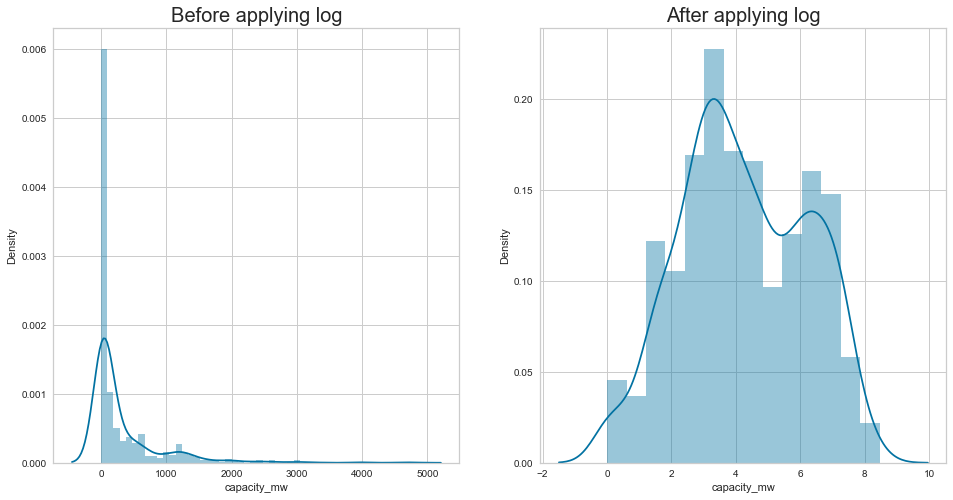

In [271]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(y)
plt.title("Before applying log",fontsize=20)
plt.subplot(1,2,2)
sns.distplot(y_new)
plt.title("After applying log",fontsize=20)

My target column is having very large value so i decided to convert it into log and second reason my target column is also right skewed so according to rule if my target column is right skewed only then i can apply log on target column and at the time of prediction i will reverse it

# Feature Scaling

In [272]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X)
X_new=pd.DataFrame(X_new,columns=x.columns)

# Checking skewness

In [273]:
X_new.skew()

gppd_idnr                    0.294357
latitude                    -0.806374
longitude                   -3.602086
primary_fuel                 0.471141
state                        0.171695
Capacity_as_per_fuel_type    3.644208
dtype: float64

# Removing skewness

In [274]:
from sklearn.preprocessing import power_transform
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

# After removing skewness

In [275]:
X_new.skew()

gppd_idnr                    0.294357
latitude                    -0.009853
longitude                    0.587490
primary_fuel                 0.090256
state                       -0.009498
Capacity_as_per_fuel_type    0.958059
dtype: float64

# Multivariate analysis

<AxesSubplot:>

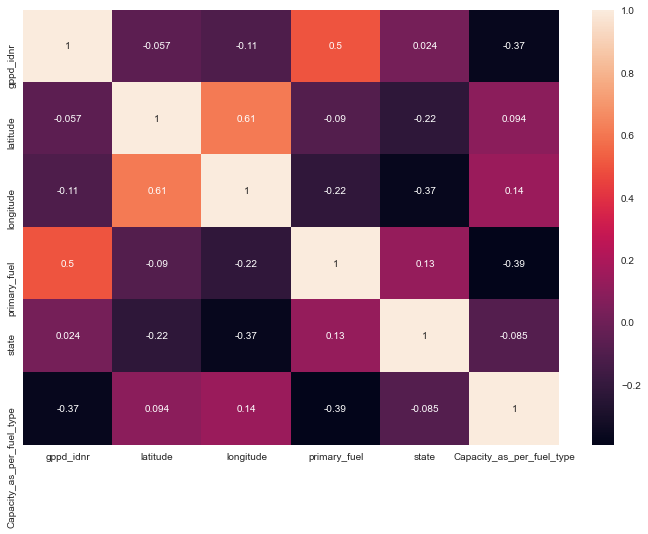

In [276]:
X_corr=X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)

We have some columns that have goog correlation in +ve way and even in -ve way that is good for model

NOTE--In this i have not checked outliers because every column was categorical except the target column so there was no meaning of checking outliers even in longitude and latitude there is no meaning of outliers checking because it represent address

In [277]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor,ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

# Training Multiple models

In [278]:
models={
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor()
}

In [279]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

**************************************** GradientBoostingRegressor **********************************************




Score 0.9959214665549878


MEAN_SQUARE_ERROR 2212.612509778687


MEAN_ABSOLUTE_ERROR 17.408835874778855


RMSE 47.0384152558171


R2_SCORE 0.9959214665549878


MODEL PERFORMANCE CURVE


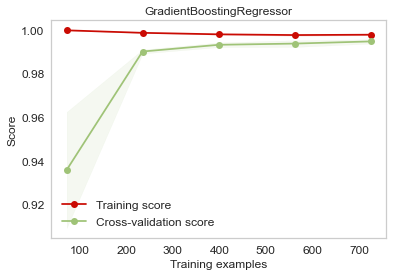

**************************************** LGBMRegressor **********************************************




Score 0.9955758901606321


MEAN_SQUARE_ERROR 26774.18414689234


MEAN_ABSOLUTE_ERROR 39.04290869119603


RMSE 163.62818872948617


R2_SCORE 0.9955758901606321


MODEL PERFORMANCE CURVE


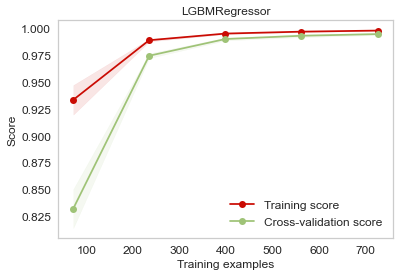

**************************************** RandomForestRegressor **********************************************




Score 0.9969382546221167


MEAN_SQUARE_ERROR 2135.1633825340905


MEAN_ABSOLUTE_ERROR 10.630149009019332


RMSE 46.20782815210092


R2_SCORE 0.9969382546221167


MODEL PERFORMANCE CURVE


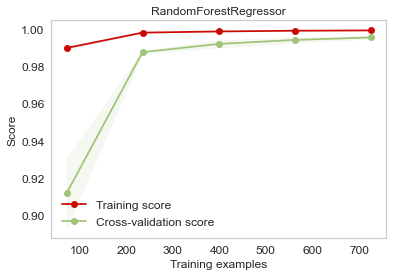

**************************************** XGBRegressor **********************************************




Score 0.9969554694137253


MEAN_SQUARE_ERROR 1317.7552321721087


MEAN_ABSOLUTE_ERROR 13.75771002658557


RMSE 36.30089850364738


R2_SCORE 0.9969554694137253


MODEL PERFORMANCE CURVE


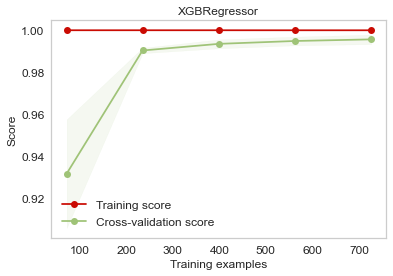

**************************************** ExtraTreesRegressor **********************************************




Score 0.9976626939708501


MEAN_SQUARE_ERROR 967.4135987975875


MEAN_ABSOLUTE_ERROR 6.081349576495054


RMSE 31.1032731203259


R2_SCORE 0.9976626939708501


MODEL PERFORMANCE CURVE


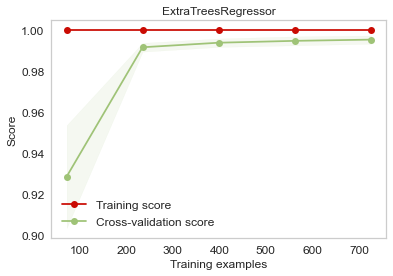

In [280]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
for name,model in models.items():
    print("****************************************",name,"**********************************************")
    Model.append(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("\n")
    cs=cross_val_score(model,X_new,y_new,cv=5,scoring='r2').mean()
    cvs.append(cs*100)
    mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
    Mse.append(mse)
    print("\n")
    sc=model.score(X_test,y_test)
    score.append(sc)
    print("Score",sc)
    print("\n")
    print("MEAN_SQUARE_ERROR",mse)
    print("\n")
    mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
    Mae.append(mae)
    print("MEAN_ABSOLUTE_ERROR",mae)
    print("\n")
    rmse=np.sqrt(mse)
    print("RMSE",rmse)
    print("\n")
    print("R2_SCORE",r2_score(y_test,y_pred))
    print("\n")
    print("MODEL PERFORMANCE CURVE")
    skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='r2',text_fontsize='large',title=name)
    plt.show()

In [281]:
models_csv=pd.DataFrame({
    'models':Model,
    "Score":score,
    'Cross_val_score':cvs,
    'Msa':Mse,
    'Mae':Mae,
    'RMSE':rmse
})

In [282]:
models_csv

,models,Score,Cross_val_score,Msa,Mae,RMSE
0,GradientBoostingRegressor,0.995921,99.489658,2212.612510,17.408836,31.103273
1,LGBMRegressor,0.995576,99.457470,26774.184147,39.042909,31.103273
2,RandomForestRegressor,0.996938,99.566852,2135.163383,10.630149,31.103273
3,XGBRegressor,0.996955,99.567740,1317.755232,13.757710,31.103273
4,ExtraTreesRegressor,0.997663,99.543891,967.413599,6.081350,31.103273


I will select Extratrees because it has less mean squared error and less mae

In [283]:
ETREE=ExtraTreesRegressor()
ETREE.fit(X_train,y_train)

ExtraTreesRegressor()

In [284]:
ETREE.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Hyperperameter Tuning

In [285]:
params={'bootstrap': [False,True],
 'criterion': ['mse','mae'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2,3],
}

In [286]:
grid=GridSearchCV(estimator=ETREE,param_grid=params,n_jobs=-1,cv=5)

In [287]:
grid.fit(X_new,y_new)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2, 3]})

In [288]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': None}

In [289]:
grid.best_score_

0.99545970609389

Score increase from 99.53 to 99.54

# Final model learnign curve

In [290]:
Etree=ExtraTreesRegressor(bootstrap= True,
 criterion= 'mse',
 max_depth= None,
 max_features= 'auto',
 max_samples= None)

<AxesSubplot:title={'center':'Final Model Learnig Curve'}, xlabel='Training examples', ylabel='Score'>

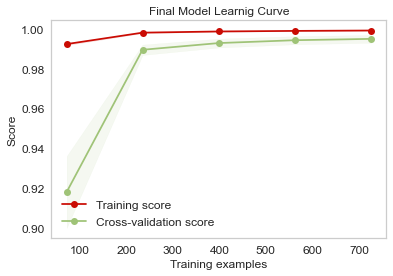

In [291]:
skplt.estimators.plot_learning_curve(Etree,X_new,y_new,cv=5,scoring='r2',text_fontsize='large',title='Final Model Learnig Curve')

# Final model Metrics

In [292]:
Etree.fit(X_train,y_train)
y_pred=Etree.predict(X_test)

In [293]:
print("Mean squared error",mean_squared_error(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model score",Etree.score(X_test,y_test))

Mean squared error 0.010034535511085326
Mean absolute error 0.04406595441571787
R2 Score 0.9971132245343144
Model score 0.9971132245343144


# Saving and loading model

In [294]:
import joblib
joblib.dump(grid,"Final model.obj")
model=joblib.load('Final model.obj')

In [295]:
pred=model.predict(X_test)
np.exp(pred)

array([1.35000e+01, 1.00000e+00, 7.20000e+01, 7.70000e+02, 4.50000e+00,
       1.50000e+00, 7.00000e+01, 2.55000e+01, 1.60000e+03, 3.30000e+02,
       3.32000e+01, 8.00000e+01, 6.40000e+01, 1.20000e+02, 1.02500e+01,
       1.05000e+01, 1.98000e+01, 1.05000e+02, 1.40000e+03, 1.50000e+01,
       1.20000e+03, 3.10000e+02, 1.00000e+00, 1.86000e+02, 4.60000e+01,
       5.00000e+00, 1.00000e+02, 5.00000e+00, 3.96000e+03, 1.05000e+01,
       2.00000e+02, 1.36500e+02, 6.48000e+02, 1.10000e+02, 6.00000e+01,
       3.00000e+02, 3.85000e+01, 6.00000e+02, 1.80000e+01, 6.50000e+01,
       3.50000e+01, 1.25000e+02, 9.00000e+01, 3.00000e+01, 2.10000e+01,
       2.05240e+02, 5.00000e+01, 2.70000e+02, 4.45000e+02, 6.00000e+00,
       1.05000e+01, 3.00000e+03, 7.89000e+01, 9.00000e+01, 2.10000e+01,
       1.50000e+01, 2.31000e+02, 3.50000e+01, 1.00000e+03, 5.00000e+00,
       1.80000e+01, 1.80000e+02, 3.00000e+02, 5.00000e+02, 1.00000e+00,
       3.00000e+01, 9.00000e+00, 1.12000e+01, 5.04000e+01, 3.500

# Building a model for classification

In [296]:
X=data.drop(['primary_fuel'],axis=1)
y=data['primary_fuel']

In [297]:
x=X

# Checking outliers

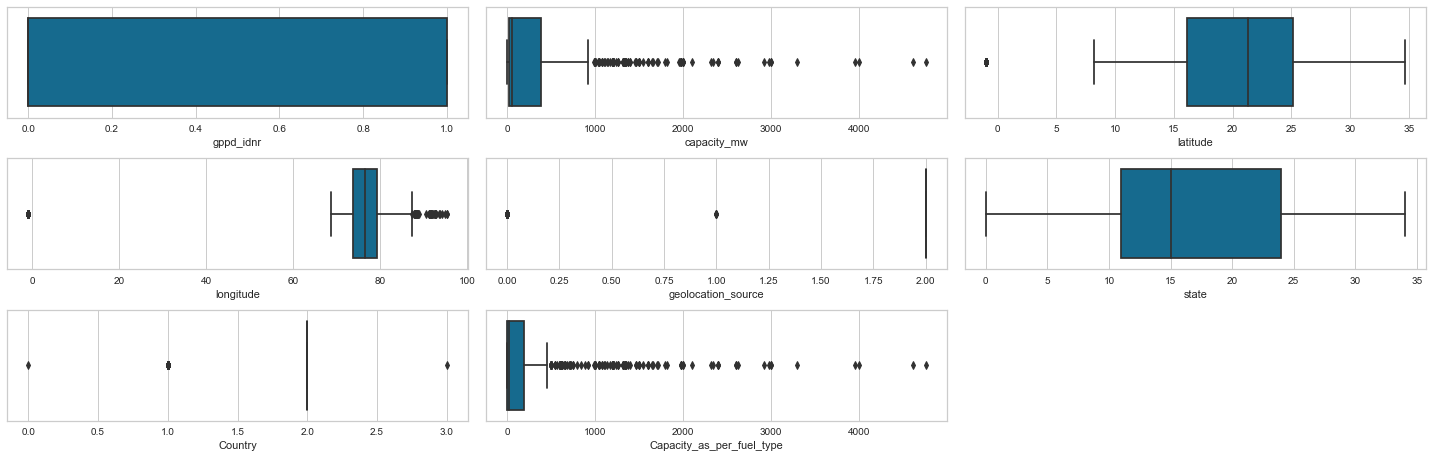

In [298]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
    plt.subplot(12,3,i+1)
    sns.boxplot(X[X_val[i]])
    plt.tight_layout()

Removing outliers using percentile method

In [299]:
for col in X.columns:
    percentile=X[col].quantile([0.01,0.98]).values
    X[col][X[col] <=percentile[0]]=percentile[0]
    X[col][X[col] >=percentile[1]]=percentile[1]

After removing outliers

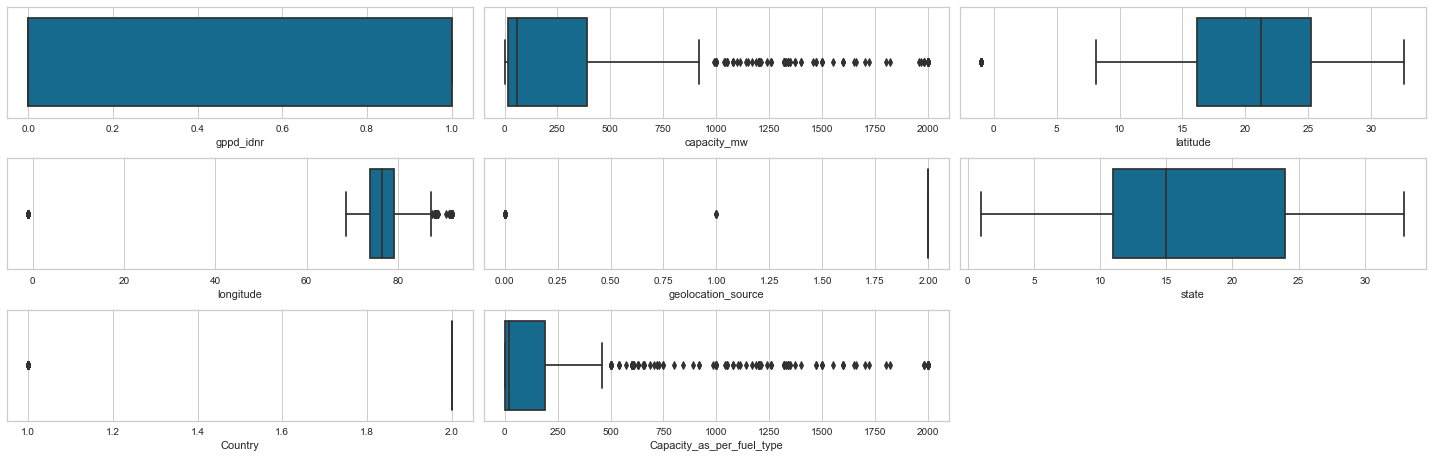

In [300]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
    plt.subplot(12,3,i+1)
    sns.boxplot(X[X_val[i]])
    plt.tight_layout()

We removed many outliers

In [301]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['primary_fuel'])

Text(0.5, 1.0, 'Balanced Data')

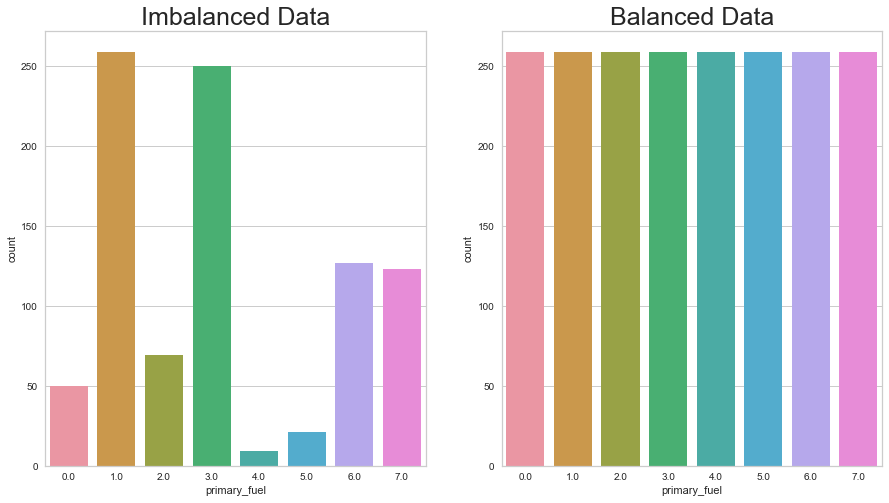

In [302]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y)
plt.title("Imbalanced Data",fontsize=25)
plt.subplot(1,2,2)
sns.countplot(y_new['primary_fuel'])
plt.title("Balanced Data",fontsize=25)

Data is balanced so my model can predict every class at good level

In [303]:
data['primary_fuel'].value_counts()

1.0    259
3.0    250
6.0    127
7.0    123
2.0     69
0.0     50
5.0     21
4.0      9
Name: primary_fuel, dtype: int64

In [304]:
X_new.skew()

gppd_idnr                    0.050618
capacity_mw                  2.114798
latitude                    -0.669240
longitude                   -3.870374
geolocation_source          -2.335731
state                        0.210757
Country                     -4.274297
Capacity_as_per_fuel_type    3.549812
dtype: float64

In [305]:
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [306]:
X_new.skew()

gppd_idnr                    0.028163
capacity_mw                  0.022823
latitude                    -0.254624
longitude                   -1.783624
geolocation_source          -2.303575
state                       -0.079212
Country                     -4.021528
Capacity_as_per_fuel_type    0.062533
dtype: float64

In [307]:
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

In [308]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [309]:
from yellowbrick.classifier.rocauc import roc_auc

In [310]:
models={
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "ExtraTreesRegressor":ExtraTreesClassifier(),
    "RandomForestRegressor":RandomForestClassifier(),
    "XGBRegressor":XGBClassifier(eval_metric='mlogloss'),
    "LIGHTGBM":LGBMClassifier()
}

******************************************* GradientBoostingClassifier ***************************************************


Accuracy_Score 0.977491961414791


SCORE 0.977491961414791


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 81  1  0  0  0  0  0]
 [ 0  0 69  2  0  0  0  1]
 [ 0  0  4 74  3  0  0  0]
 [ 0  0  0  0 84  1  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  1 65  0]
 [ 0  0  0  0  0  0  0 79]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      0.99      0.99        82
         2.0       0.93      0.96      0.95        72
         3.0       0.97      0.91      0.94        81
         4.0       0.95      0.99      0.97        85
         5.0       0.98      0.99      0.98        81
         6.0       1.00      0.98      0.99        66
         7.0       0.99      1.00      0.99        79

    accuracy                           0.98       622
   macro av

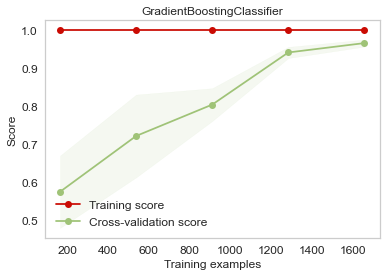

******************************************* ExtraTreesRegressor ***************************************************


Accuracy_Score 0.9598070739549839


SCORE 0.9598070739549839


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0]
 [ 0  2 62  4  2  0  0  2]
 [ 0  1  6 69  4  1  0  0]
 [ 0  0  0  0 85  0  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  0 65  1]
 [ 0  0  0  0  0  1  0 78]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.96      1.00      0.98        82
         2.0       0.91      0.86      0.89        72
         3.0       0.95      0.85      0.90        81
         4.0       0.92      1.00      0.96        85
         5.0       0.98      0.99      0.98        81
         6.0       1.00      0.98      0.99        66
         7.0       0.96      0.99      0.97        79

    accuracy                           0.96       622
   macro avg    

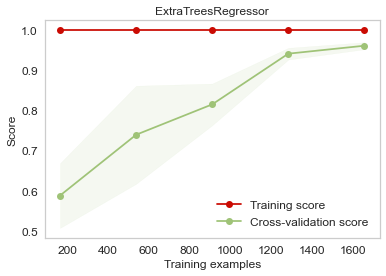

******************************************* RandomForestRegressor ***************************************************


Accuracy_Score 0.9405144694533762


SCORE 0.9405144694533762


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 77  3  1  0  0  0  1]
 [ 0  4 59  3  3  2  0  1]
 [ 0  0  7 70  3  1  0  0]
 [ 0  0  3  0 80  1  0  1]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  0 65  1]
 [ 0  0  0  0  0  1  0 78]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.95      0.94      0.94        82
         2.0       0.82      0.82      0.82        72
         3.0       0.95      0.86      0.90        81
         4.0       0.92      0.94      0.93        85
         5.0       0.94      0.99      0.96        81
         6.0       1.00      0.98      0.99        66
         7.0       0.95      0.99      0.97        79

    accuracy                           0.94       622
   macro avg  

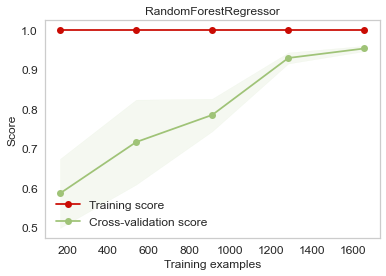

******************************************* XGBRegressor ***************************************************


Accuracy_Score 0.9790996784565916


SCORE 0.9790996784565916


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0]
 [ 0  2 69  1  0  0  0  0]
 [ 0  0  3 74  4  0  0  0]
 [ 0  0  0  0 84  1  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  0 65  1]
 [ 0  0  0  0  0  0  0 79]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.98      1.00      0.99        82
         2.0       0.96      0.96      0.96        72
         3.0       0.99      0.91      0.95        81
         4.0       0.94      0.99      0.97        85
         5.0       0.99      0.99      0.99        81
         6.0       1.00      0.98      0.99        66
         7.0       0.99      1.00      0.99        79

    accuracy                           0.98       622
   macro avg       0.98

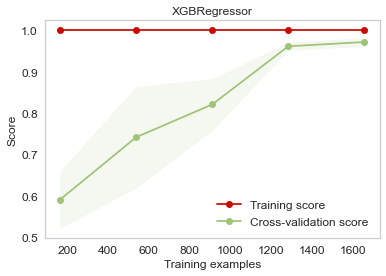

******************************************* LIGHTGBM ***************************************************


Accuracy_Score 0.9855305466237942


SCORE 0.9855305466237942


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0]
 [ 0  1 70  1  0  0  0  0]
 [ 0  0  2 76  3  0  0  0]
 [ 0  0  0  0 85  0  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  0 65  1]
 [ 0  0  0  0  0  0  0 79]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.99      1.00      0.99        82
         2.0       0.97      0.97      0.97        72
         3.0       0.99      0.94      0.96        81
         4.0       0.96      1.00      0.98        85
         5.0       1.00      0.99      0.99        81
         6.0       1.00      0.98      0.99        66
         7.0       0.99      1.00      0.99        79

    accuracy                           0.99       622
   macro avg       0.99    

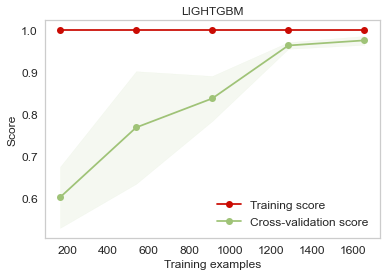

In [311]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
    print("*******************************************",name,"***************************************************")
    MODEL.append(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('\n')
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print('\n')
    print("SCORE",model.score(X_test,y_test))
    print("\n")
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print('\n')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print('\n')
    print(report)
    csv=cross_val_score(model,X_new,y_new,cv=5).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print('\n')
    skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

I will select XGBClassifier because of cross_val_Score and metrics of XGB model

In [312]:
XGB=XGBClassifier(eval_metric='mlogloss')
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [313]:
XGB.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'mlogloss'}

In [314]:
param_class={
 'max_depth': [6,5,7],
 'n_jobs': [0,1,2],
 'num_parallel_tree': [1,2,3],
 'subsample': [1,2,3],
 'verbosity': [None,0,1,2]}

In [315]:
GRID_classifier=GridSearchCV(estimator=XGB,param_grid=param_class,n_jobs=-1,cv=5)

In [316]:
GRID_classifier.fit(X_new,y_new)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=0, gpu_id=-1,
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constrain...
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', ran

In [317]:
GRID_classifier.best_params_

{'max_depth': 5,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'subsample': 1,
 'verbosity': None}

In [318]:
GRID_classifier.best_score_

0.9763587684069611

Accuracy increase from 97.20 to 97.63

In [319]:
xgb=XGBClassifier(max_depth= 5,
 n_jobs= 0,
 num_parallel_tree= 1,
 subsample= 1,
 verbosity= None,
 eval_metric='mlogloss')

# Final Model Learning Curve

MODEL LEARNING CURVE


<Figure size 864x576 with 0 Axes>

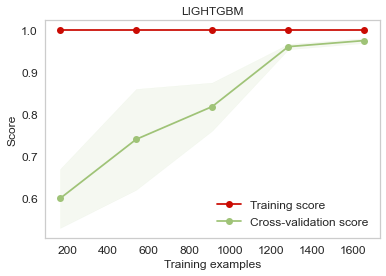

In [320]:
plt.figure(figsize=(12,8))
eval_metric='mlogloss'
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(xgb,X_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

# Final Model Matrics

In [321]:
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print("Accuracy_score",accuracy_score(y_test,y_pred))
print("Confusion Matrics")
print('\n')
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print('\n')
print(classification_report(y_test,y_pred))

Accuracy_score 0.9807073954983923
Confusion Matrics


[[76  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0]
 [ 0  1 71  0  0  0  0  0]
 [ 0  0  3 76  2  0  0  0]
 [ 0  0  0  1 83  1  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  1  0 64  1]
 [ 0  0  0  0  0  1  0 78]]
Classification Report


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.99      1.00      0.99        82
         2.0       0.96      0.99      0.97        72
         3.0       0.99      0.94      0.96        81
         4.0       0.95      0.98      0.97        85
         5.0       0.98      0.99      0.98        81
         6.0       1.00      0.97      0.98        66
         7.0       0.99      0.99      0.99        79

    accuracy                           0.98       622
   macro avg       0.98      0.98      0.98       622
weighted avg       0.98      0.98      0.98       622



In [322]:
import joblib 
joblib.dump(GRID_classifier,"classifier.obj")

['classifier.obj']

In [323]:
model=joblib.load('classifier.obj')

In [324]:
model.predict(X_test)

array([4., 3., 3., 4., 6., 3., 3., 2., 6., 2., 7., 5., 2., 6., 0., 7., 1.,
       2., 3., 2., 7., 2., 6., 3., 7., 1., 4., 5., 7., 5., 1., 3., 7., 2.,
       5., 2., 3., 3., 1., 0., 2., 1., 4., 7., 7., 6., 3., 5., 3., 7., 4.,
       0., 6., 1., 5., 1., 3., 5., 1., 0., 5., 5., 5., 1., 4., 0., 7., 3.,
       4., 4., 1., 5., 3., 3., 7., 4., 1., 6., 7., 1., 3., 7., 3., 6., 7.,
       5., 0., 0., 4., 2., 2., 4., 7., 0., 2., 5., 4., 7., 2., 3., 5., 5.,
       7., 4., 1., 6., 3., 5., 0., 6., 1., 4., 4., 3., 7., 4., 2., 3., 7.,
       3., 7., 1., 4., 3., 3., 0., 4., 4., 0., 1., 1., 7., 3., 3., 0., 1.,
       7., 4., 1., 1., 6., 5., 3., 0., 4., 1., 6., 4., 7., 2., 6., 1., 5.,
       1., 0., 5., 4., 0., 5., 5., 4., 4., 4., 4., 3., 2., 5., 5., 3., 4.,
       7., 0., 1., 5., 0., 4., 7., 4., 2., 0., 1., 4., 5., 2., 0., 6., 0.,
       1., 4., 6., 2., 5., 5., 6., 2., 5., 6., 4., 5., 0., 1., 1., 3., 0.,
       4., 1., 0., 3., 4., 6., 1., 5., 6., 7., 1., 6., 7., 4., 6., 0., 3.,
       6., 5., 0., 4., 2.

# Conclusion

1-In this model i have to build two models one which can predict capacity mw and other which can predict fuel type

2-so for the cpacity mw model i did eda and tried to understand the importnace of feature over target column

3-and i had longitude and latitude so with the help of them i found the city and state name and did eda on them also

4-and i did feature engineering where i added some columns like city and state and aslo added a column which shows for a particular fuel type how much energy require capacity mw

5-and finally i build a model extratree was giving me good accuracy and good matrics score as well

6-i did not removed outliers in model 1 because no continuous column was there all the columns was categorical

7-and for my second model that is classification base model i use upsampling SMOTE, i used smote because it just dont paste the sample again and again it do sampling synthetically

8-then i applied classifier algorithms and xgbxlassifier was giving me good matrics as compare to other

9-and in classification model i removed outliers because there was some continous columns and i use to replace outliers with percentile method so i will not loose data because dataset is already small